# Neural Operator

### Thermal Energy Storage

The main objective of this task is to apply neural operators and this task is related to the preliminary design of a thermal energy storage device. 

The device is used in solar power plants to store thermal energy during the charging phase and release it for production of electricity during the discharging phase. The thermal energy is stored due to the interaction of a fluid and a solid phase. During the charging state the fluid is injected at high temperature from one end of the storage and heats the solid up. In contrast, during the discharging phase the reverse process occurs: cold fluid flows from the opposite end and absorbs heat from the solid. Between charging and discharging idle phases take place, where no fluid enters the thermal storage. 

Therefore, at any instant of time the thermal storage can be in one of the following states:

1. Charging
2. Idle (between charging and discharging)
3. Discharging
4. Idle (between charging and discharging)

Together the four states establish a cycle and the same process is repeated for several cycles until the thermal storage reaches a periodic or stationary regime.

### Mathematical Model

The temperature evolution of the $solid$ and $fluid$ phases, $T_s$ and $T_f$ is described by a system of two linear reaction-convection-diffusion equations:

\begin{align}
    \varepsilon \rho_f C_f \frac{\partial T_f}{\partial t} + \varepsilon \rho_f C_f u_f(t) \frac{\partial T_f}{\partial x} & = \lambda_f \frac{\partial^2 T_f}{\partial x^2} - h_v (T_f - T_s) \notag\\[10pt]
    (1 - \varepsilon) \rho_s C_s \frac{\partial T_s}{\partial t} & = \lambda_s \frac{\partial^2 T_s}{\partial x^2} + h_v (T_f - T_s) \notag
\end{align}

with $\rho$ beign the density of the corresponding phases, $C$ the specific heat, $\lambda$ the diffusivity, $\varepsilon$ the solid porosity, $u_f$ the fluid velocity entering the thermal storage and $h_v$ the heat exchange coefficient between the solid and fluid.

The fluid velocity is assumed to be uniform along the cylinder and varying only in time: $u_f = u$ during charging, $u = 0$ during idle and $u_f = -u$ during discharging, with u being a positive constant.

The system of equations has to be augmented with suitable initial and boundary conditions:

\begin{align}
    T_f(x, t=0) & = T_s(x, t=0) = T_0, \:\:\:\: x \in [0,L] \notag\\[10pt]
    \frac{\partial T_s(x,t)}{\partial x}\bigg|_{x=0} & = \frac{\partial T_s(x,t)}{\partial x}\bigg|_{x=L} = 0,\:\:\:\: t \in [0, T] \notag
\end{align}

The boundary conditions for the fluid instead will be different according to the current state of the thermal storage:
 1. $\textbf{Charging State:}$

\begin{equation}
    T_f(0, t) = T_{hot}, \:\:\:\: \frac{\partial T_f(x,t)}{\partial x} \bigg|_{x = L} = 0, \:\:\:\: t \in [0, T] \notag
\end{equation}

 2. $\textbf{Discharging State:}$

\begin{equation}
    \frac{\partial T_f(x,t)}{\partial x} \bigg|_{x = 0} = 0, \:\:\:\: T_f(L,t) = T_{cold}, \:\:\:\: t \in [0, T] \notag
\end{equation}

 3. $\textbf{Idle Phase:}$

\begin{equation}
    \frac{\partial T_f(x,t)}{\partial x} \bigg|_{x = 0} = 0, \:\:\:\: \frac{\partial T_f(x,t)}{\partial x} \bigg|_{x = L} = 0, \:\:\:\: t \in [0, T] \notag
\end{equation}

### Time Series Forecasting with Neural Operators

The goal is to forecast the fluid and solid temperature in the frame $[T, T_{end}]$, $T_{end}$ = 602'168s. Thus a learning model based on Neural Operators with the provided data TrainingData.txt should be used as well as make predictions with the test set TestingData.txt.

There are different possible choices for neural operator approaches, just to name 3:

1. $\textbf{FNO (Fourier Neural Operator)}$
2. GNO (Graph Neural Operator)
3. CNO (Convolutional Neural Operator)

Now the question arises which one is expected to give the best result? I ended up with FNO as the chosen approach, since our problem is 1 dimensional and time dependent.

In [18]:
import torch
import torch.nn as nn
import os
import numpy as np

from training import FNO_Trainer
from utils import validate, plot_pred_results

torch.manual_seed(0)
np.random.seed(0)

## Hyperparameter Settings and Intantiation of the FNO based Model

In [19]:
learning_rate = 0.001
epochs = 500
step_size = 50 
gamma = 0.5

# The window size describes the set size for the mapping
windowsize = 35 # Mapping from a set to another set

# modes = 209 // 2 + 1 
modes = windowsize // 2 + 1
width = 64

fno_Tf = FNO_Trainer(modes, width, windowsize, 'fluid')
fno_Ts = FNO_Trainer(modes, width, windowsize, 'solid')

## Plotting the Measurement Data used for Training

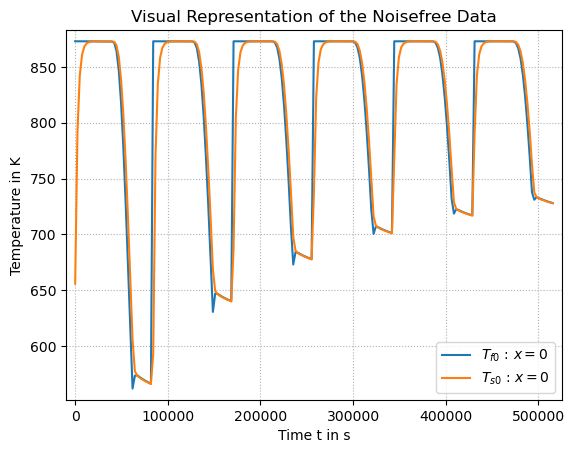

In [20]:
fno_Tf.plot_data()

## Train and Validate the FNO Model

In [21]:
# Train the FNO model for the fluid
fno_Tf.train(epochs, learning_rate, step_size, gamma)

######### Epoch: 0  ######### Train Loss: 0.12233959266450256  ######### Relative L2 Test Norm: 15.535596787929535
######### Epoch: 1  ######### Train Loss: 0.003682937095163652  ######### Relative L2 Test Norm: 4.956073075532913
######### Epoch: 2  ######### Train Loss: 0.0007217990332719637  ######### Relative L2 Test Norm: 1.9626802131533623
######### Epoch: 3  ######### Train Loss: 0.000502488394545253  ######### Relative L2 Test Norm: 3.0163872241973877
######### Epoch: 4  ######### Train Loss: 0.0009150035380116606  ######### Relative L2 Test Norm: 3.249561160802841
######### Epoch: 5  ######### Train Loss: 0.0010756728106571245  ######### Relative L2 Test Norm: 2.9184835478663445
######### Epoch: 6  ######### Train Loss: 0.001086476235286682  ######### Relative L2 Test Norm: 2.6216216273605824
######### Epoch: 7  ######### Train Loss: 0.0011211419546270918  ######### Relative L2 Test Norm: 2.652658887207508
######### Epoch: 8  ######### Train Loss: 0.00123511769606921  #########

In [22]:
# Train the FNO model for the solid
fno_Ts.train(epochs, learning_rate, step_size, gamma)

######### Epoch: 0  ######### Train Loss: 0.12607954241684638  ######### Relative L2 Test Norm: 17.269802808761597
######### Epoch: 1  ######### Train Loss: 0.005100377853523241  ######### Relative L2 Test Norm: 3.2616312205791473
######### Epoch: 2  ######### Train Loss: 0.0008069067066571733  ######### Relative L2 Test Norm: 4.443925030529499
######### Epoch: 3  ######### Train Loss: 0.001762069221058482  ######### Relative L2 Test Norm: 6.356743723154068
######### Epoch: 4  ######### Train Loss: 0.002318004810149432  ######### Relative L2 Test Norm: 6.598307192325592
######### Epoch: 5  ######### Train Loss: 0.0022877857663843315  ######### Relative L2 Test Norm: 6.2791798412799835
######### Epoch: 6  ######### Train Loss: 0.001965226121683372  ######### Relative L2 Test Norm: 5.702712297439575
######### Epoch: 7  ######### Train Loss: 0.0015952729227137752  ######### Relative L2 Test Norm: 5.04323410987854
######### Epoch: 8  ######### Train Loss: 0.0012670349660766078  ######### R

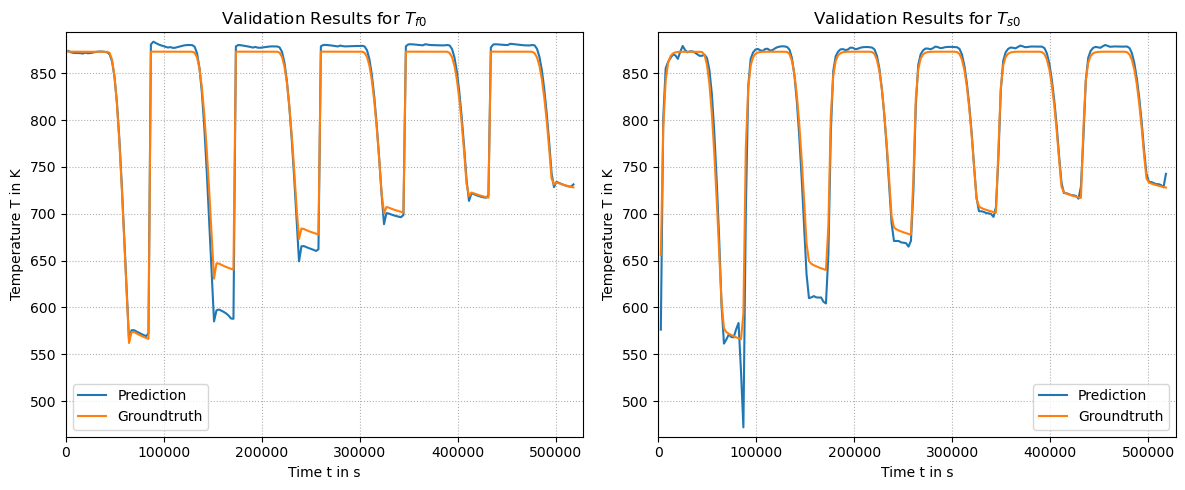

In [23]:
# Validation of the results
validate(fno_Tf, fno_Ts)

## Predictions into the Future

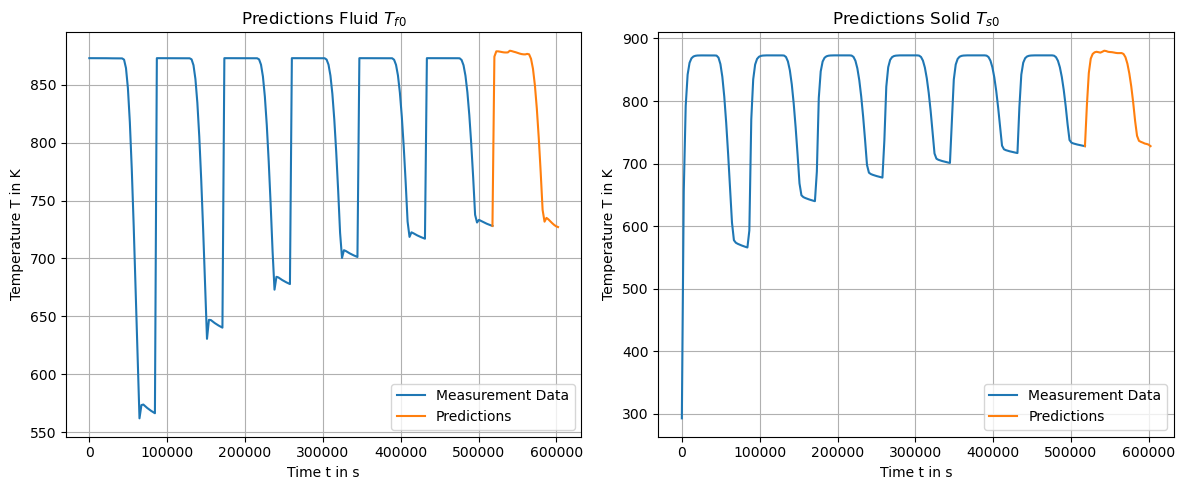

In [24]:
# Get the predictions
out_predict_t, out_predict_Tf0 = fno_Tf.predict()
_ , out_predict_Ts0 = fno_Ts.predict()

Tf0 = fno_Tf.Tf0
Ts0 = fno_Ts.Ts0
t_train = fno_Tf.t_train

# Plot the predictions
plot_pred_results(t_train, Tf0, Ts0, out_predict_t.detach(), out_predict_Tf0.detach(), out_predict_Ts0.detach())

## Store results

In [25]:
out_predict_t = out_predict_t[1:].reshape(-1,1)
out_predict_Tf0 = out_predict_Tf0[1:].reshape(-1,1)
out_predict_Ts0 = out_predict_Ts0[1:].reshape(-1,1)

results = torch.concat([out_predict_t, out_predict_Tf0, out_predict_Ts0], dim=1)
results = results.detach().numpy()
import pandas as pd
results = pd.DataFrame(results, columns=['t', 'tf0', 'ts0'])
# To store the resulting txt file uncomment the following line
# results.to_csv('predictions.txt', index=False)